In [1]:
from datascience import *
import numpy as np
# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math
from scipy import stats
import numpy as np

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn.businessformtemplate.com/samples/Eviction_Notice.png")


# PLAN FOR DATA JUSTICE IN EVICTION


Data provided by 

http://www.antievictionmappingproject.net

https://www.immigrationadvocates.org/nonprofit/legaldirectory/search?&state=CA&national=0&county=&legalArea=&legalService=&nonLegalService=&interestArea=&population=&legalNetwork=&language=&detentionFacility=&text=&zip=&interpreting=0&map=1 


## EVICTION

- Eviction is a very serious issue in today's society. People are getting evicted from their homes and houses at an alarming rate and there is very little data about what happens after they become evicted or what options they had financially. We're going to examine the eviction data with other places in the United States and compare the two. But before that, we need an accurate picture and an intuitive understanding of just how bad eviction has become.

- The Eviction data I worked with is from a website called AntiEvictionMappingProject. The Oakland Map specifically is what we're going to be examining. There is ample eviction data all across the Bay Area, but we're only taking a look at a tiny part of it to understand the bigger picture. To minimize the deviation from the complete data set, we're going to look at 3 different sample sizes; 

- First, we're going to look at a tiny street corner with less than 5 evictions, Second, we're going to examine a moderate size street called Alcatraz Avenue which has about 10 evictions.
## RESOURCES
- Once we get a good understanding of the eviction situation in Oakland, we're going to take a look at some of the resources available to immigrants and people that have been evicted from their homes in the East Bay and compare it to other areas, such as San Francisco, Los Angeles, and various areas in between. 

In [4]:
import datetime
#Relative day between the constraints of the graph
def yearconversion(year,month,day):
    begin = datetime.date(2015, 11, 30);
    end = datetime.date(2005, 1, 1);
    deltad = (begin - end);
    current = datetime.date(year,month,day) - end;
    proportionoftime = current/deltad
    return proportionoftime

In [5]:
#Returns an array of the year converted proportions to be applied to a table
def proportioncollector(table):
    emp = make_array()
    for i in np.arange(len(table.column(0))):
        singlerow = table.row(i)
        emp = np.append(emp, yearconversion(singlerow.item(2),singlerow.item(3),singlerow.item(4)))
    return emp


In [6]:
smallstreet = Table.read_table('62ndStreet.csv')

In [7]:
((smallstreet.sort('Eviction Day',descending = True)).sort('Eviction Month', descending = True)).sort('Eviction Year', descending = True)

ADDRESS,Number of Evictions,Eviction Year,Eviction Month,Eviction Day
579 62nd St,1,2006,10,13
552 62nd St,1,2006,12,31
571 62nd St,1,2005,2,28


In [8]:
resources = Table.read_table('resources.csv')
resources

Name,Area,Type of Support
Bay Area Legal Aid,East Bay,Legal Aid Office
International Institute-Legal,East Bay,Family Law Attorney
Refugee Transitions,East Bay,Tutoring Service
National Network For Immigrant,East Bay,Non Profit Organization
Social Justice Collaborative,East Bay,Non Profit Organization
Catholic Charities of the East Bay,East Bay,Social Services Organization
Immigration Center for Women and Children,East Bay,Corporate Office
International Rescue Committee,East Bay,Social Services Organization
East Bay Sanctuary Covenant,East Bay,Non Profit Organization
CARECEN,Los Angeles,Non Profit Organization


In [9]:
eastbay = resources.where(' Area', are.equal_to(' East Bay'))
eastbay

Name,Area,Type of Support
Bay Area Legal Aid,East Bay,Legal Aid Office
International Institute-Legal,East Bay,Family Law Attorney
Refugee Transitions,East Bay,Tutoring Service
National Network For Immigrant,East Bay,Non Profit Organization
Social Justice Collaborative,East Bay,Non Profit Organization
Catholic Charities of the East Bay,East Bay,Social Services Organization
Immigration Center for Women and Children,East Bay,Corporate Office
International Rescue Committee,East Bay,Social Services Organization
East Bay Sanctuary Covenant,East Bay,Non Profit Organization


In [10]:
losangeles = resources.where(' Area', are.equal_to(' Los Angeles'))
losangeles

Name,Area,Type of Support
CARECEN,Los Angeles,Non Profit Organization
Coalition for Human Immigrant Rights of Los Angeles,Los Angeles,Social Services
Esperanza,Los Angeles,Non Profit Organization
Immigration Center for Women and Children,Los Angeles,Immigration Attorney
Korean Resource Center 민족학교,Los Angeles,Non Profit Organization
National Immigration Law Center,Los Angeles,Legal Services
Legal Aid Foundation of Los Angeles,Los Angeles,Immigration Attorney
Immigration Legal Assistance,Los Angeles,Immigration Attorney
Career Advantage Inc.,Los Angeles,Employment Agency
Catholic Charities,Los Angeles,Social Services


In [11]:
gilroy = resources.where(' Area', are.equal_to(' Gilroy'))
gilroy

Name,Area,Type of Support
Catholic Charities Immigration,Gilroy,Social Services Organization
Hope Services,Gilroy,Social Services Organization


In [12]:
watsonville = resources.where(' Area', are.equal_to(' Watsonville'))
watsonville

Name,Area,Type of Support
La Manzana Community Resources,Watsonville,Community Center


In [13]:
fresno = resources.where(' Area', are.equal_to(' Fresno'))
fresno

Name,Area,Type of Support
Central California Legal Services,Fresno,Law Firm
California Rural Legal Assistance,Fresno,Non Profit Organization
Kids in Need of Defense,Fresno,Non Profit Organization


In [14]:
bakersfield = resources.where(' Area', are.equal_to(' Bakersfield'))
bakersfield

Name,Area,Type of Support
O.L.A. RAZA,Bakersfield,Non Profit Organization
United Farm Workers Foundation,Bakersfield,Immigration Attorney
Greater Bakersfield Legal Assistance,Bakersfield,Legal Services


In [15]:
ordered = resources.sort(' Area', descending = True)
ordered

Name,Area,Type of Support
La Manzana Community Resources,Watsonville,Community Center
Catholic Charities,Los Angeles,Social Services Organization
International Institute of LA,Los Angeles,Immigration Attorney
Diamante Law Group APLC,Los Angeles,Immigration Attorney
El Rescate,Los Angeles,Immigration and Naturalization Service
Franco Law Group,Los Angeles,Attorney
International Institute of Los Angeles,Los Angeles,Immigration and Naturalization Service
Asosal,Los Angeles,Immigration and Naturalization Service
Immigrants Charitable Foundation,Los Angeles,Foundation
Center for Human Rights and Law,Los Angeles,Non Profit Organization


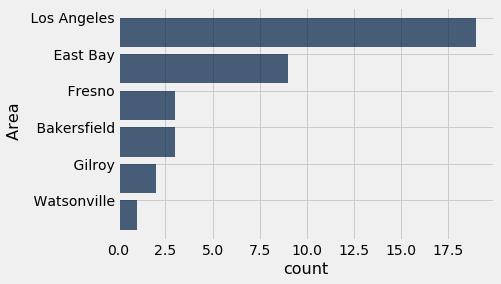

In [16]:
areabar = resources.group(' Area')
pre = areabar.sort('count', descending = True)
pre.barh(' Area')

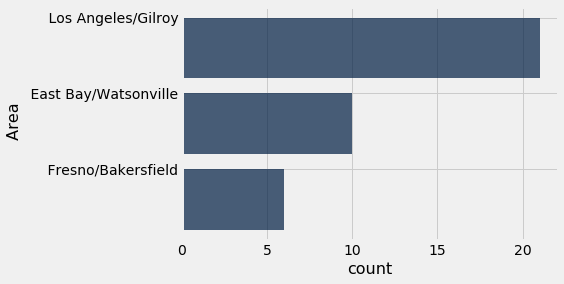

In [17]:
orderedresources = Table.read_table('orderedresources.csv')
areabar = orderedresources.group(' Area')
pre = areabar.sort('count', descending = True)
pre.barh(' Area')

In [18]:
stations = Table.read_table('furthereast.csv')
stations

Location,lat,long,color
East Lake Merritt,37.8063,-122.239,yellow
San Leandro,37.7249,-122.156,yellow
Union City,37.5934,-122.044,yellow
Bay point,38.0291,-121.962,orange
Antioch,38.0049,-121.806,orange
Concord,37.978,-122.031,orange
Stockton,37.9577,-121.291,red
San Joaquin,37.9176,-121.171,red
Sacramento,38.5816,-121.494,red
Bakersfield,35.3733,-119.019,red


In [19]:
Marker.map_table(stations.select('lat', 'long', 'color'))